In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn
from skimage import data, color
from skimage.transform import resize

In [2]:
(X_antrenare, y_antrenare) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_antrenare = X_antrenare / 255
X_test = X_test / 255

In [4]:
X_antrenare_fl = X_antrenare.reshape(len(X_antrenare), 28*28)
X_test_fl = X_test.reshape(len(X_test), 28*28)

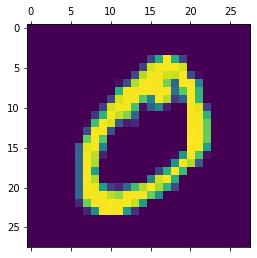

In [5]:
plt.matshow(X_antrenare[1])

In [6]:
y_antrenare[1]

0

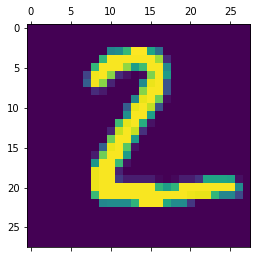

In [7]:
plt.matshow(X_test[1])

In [8]:
y_test[1]

2

In [9]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_antrenare_fl, y_antrenare, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4551 - accuracy: 0.8719
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1336 - accuracy: 0.9601
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0859 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0637 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0477 - accuracy: 0.9848


Text(69.0, 0.5, 'Realitate')

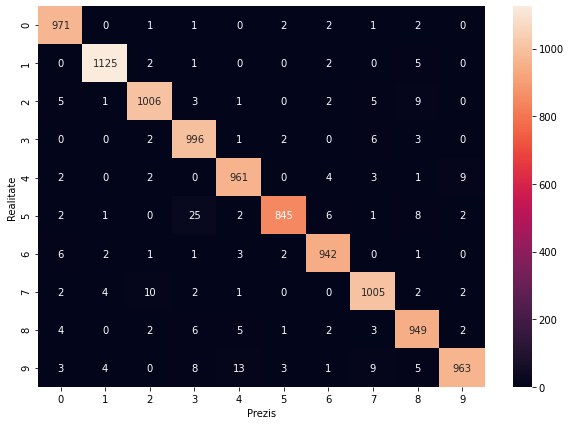

In [10]:
y_prezis = model.predict(X_test_fl)
y_prezis_labels = [np.argmax(i) for i in y_prezis]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_prezis_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prezis')
plt.ylabel('Realitate')

In [11]:
pic = plt.imread("5.jpg")

In [12]:
pic = color.rgb2gray(pic)

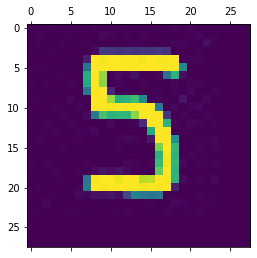

In [13]:
plt.matshow(pic)

In [14]:
pic 

array([[0.00784314, 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.00784314, 0.00784314, 0.        , 0.00392157,
        0.00392157, 0.00784314, 0.        , 0.01568627, 0.00392157,
        0.01176471, 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.01568627, 0.        , 0.        , 0.00392157,
        0.00784314, 0.        , 0.        , 0.        , 0.01960784,
        0.01568627, 0.        , 0.00784314, 0.        , 0.01176471,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.00784314, 0.01568627, 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.00784314, 0.        , 0.        , 0.00784314,
        0.        , 0.        , 0.00784314, 0.00392157, 0.        ,
        0.        , 0.00392157, 0.        , 0.00784314, 0.        ,
        0.        , 0.    

In [15]:
pic_fl = pic.reshape(28*28)

In [16]:
pic_fl

array([0.00784314, 0.        , 0.        , 0.00784314, 0.        ,
       0.        , 0.        , 0.        , 0.00784314, 0.        ,
       0.        , 0.00784314, 0.00784314, 0.        , 0.00392157,
       0.00392157, 0.00784314, 0.        , 0.01568627, 0.00392157,
       0.01176471, 0.        , 0.        , 0.00392157, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01568627,
       0.        , 0.        , 0.00392157, 0.00784314, 0.        ,
       0.        , 0.        , 0.01960784, 0.01568627, 0.        ,
       0.00784314, 0.        , 0.01176471, 0.        , 0.        ,
       0.00392157, 0.        , 0.        , 0.00784314, 0.01568627,
       0.        , 0.00784314, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00784314, 0.        , 0.        ,
       0.00784314, 0.        , 0.        , 0.00784314, 0.00392157,
       0.        , 0.        , 0.00392157, 0.        , 0.00784314,
       0.        , 0.        , 0.        , 0.00392157, 0.01568

In [17]:
rezultat = model.predict(np.expand_dims(pic_fl,0))

In [18]:
np.argmax(rezultat)

5